In [106]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (accuracy_score, precision_score,
                            recall_score, f1_score, roc_auc_score,
                            ConfusionMatrixDisplay,RocCurveDisplay)
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [2]:
df = pd.read_csv('hypertension_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object 
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Medication        1186 non-null   object 
 7   Family_History    1985 non-null   object 
 8   Exercise_Level    1985 non-null   object 
 9   Smoking_Status    1985 non-null   object 
 10  Has_Hypertension  1985 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 170.7+ KB


In [ ]:
# Identifying Categorical and Numeric Columns
cat_cols = df.select_dtypes(include=['object']).columns
numeric_cols = df.select_dtypes(include=['number']).columns
print("Categorical columns:", cat_cols)
print('---------------------------------------------------')
print("Numeric columns:", numeric_cols)

Categorical columns: Index(['BP_History', 'Medication', 'Family_History', 'Exercise_Level',
       'Smoking_Status', 'Has_Hypertension'],
      dtype='object')
---------------------------------------------------
Numeric columns: Index(['Age', 'Salt_Intake', 'Stress_Score', 'Sleep_Duration', 'BMI'], dtype='object')


In [3]:
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


In [23]:
for col in cat_cols:
    print(f"{col}:",df[col].unique(),'|Count:', df[col].nunique(),'|nulls:', df[col].isnull().sum())

BP_History: ['Normal' 'Hypertension' 'Prehypertension'] |Count: 3 |nulls: 0
Medication: [nan 'ACE Inhibitor' 'Other' 'Beta Blocker' 'Diuretic'] |Count: 4 |nulls: 799
Family_History: ['Yes' 'No'] |Count: 2 |nulls: 0
Exercise_Level: ['Low' 'Moderate' 'High'] |Count: 3 |nulls: 0
Smoking_Status: ['Non-Smoker' 'Smoker'] |Count: 2 |nulls: 0
Has_Hypertension: ['Yes' 'No'] |Count: 2 |nulls: 0


In [38]:
print(df.shape)
print('------------------')
print(df.isnull().sum())

(1985, 11)
------------------
Age                   0
Salt_Intake           0
Stress_Score          0
BP_History            0
Sleep_Duration        0
BMI                   0
Medication          799
Family_History        0
Exercise_Level        0
Smoking_Status        0
Has_Hypertension      0
dtype: int64


In [39]:
# Null Values Handling
df['Medication'] = df['Medication'].fillna("Unknown")

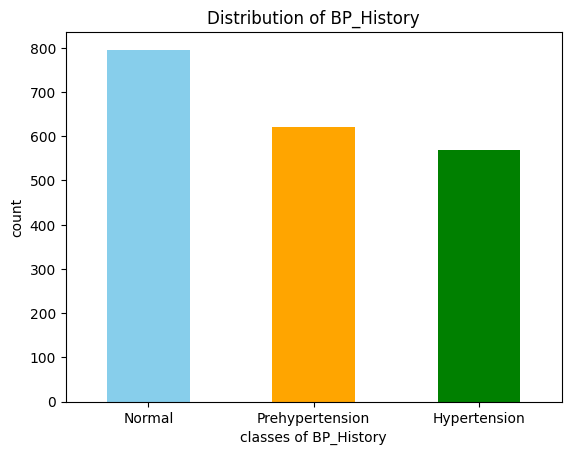

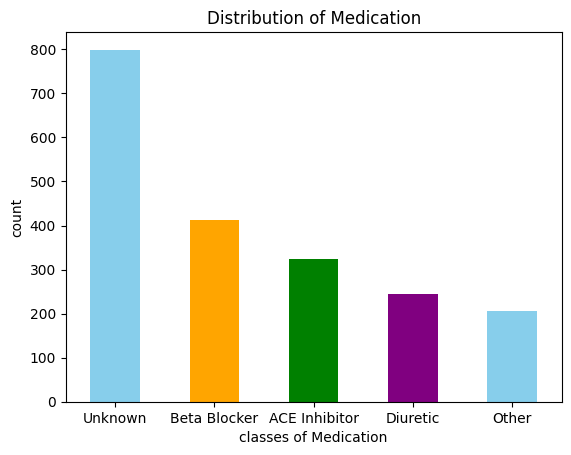

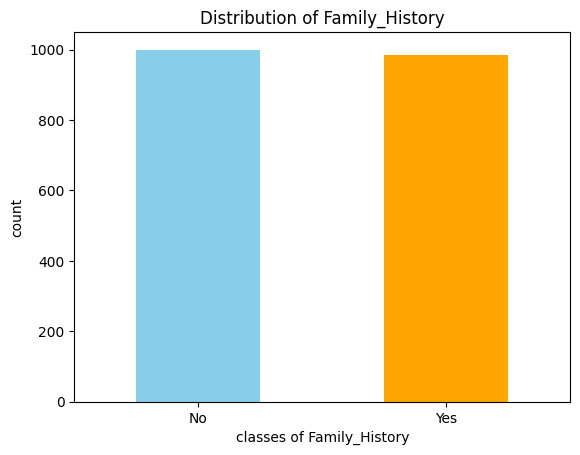

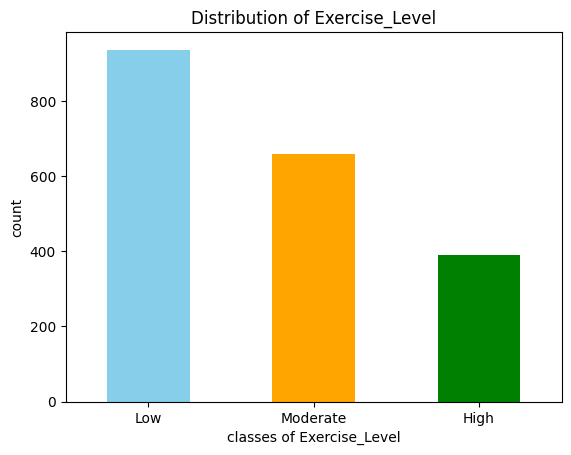

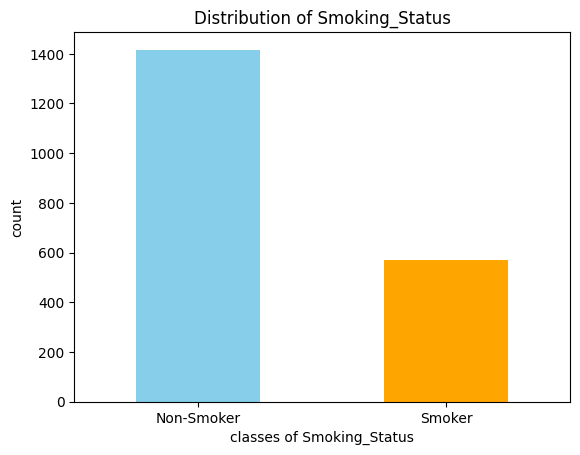

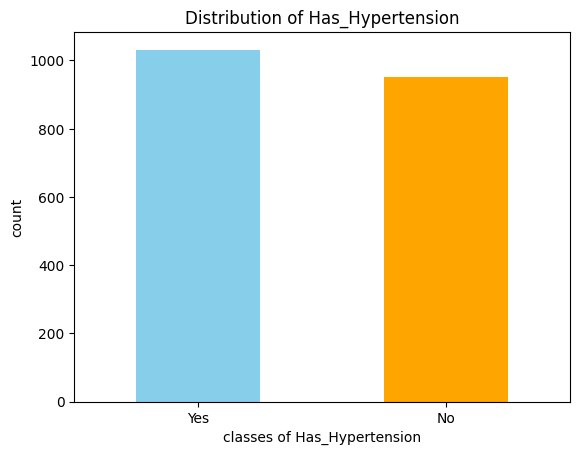

In [40]:
# Visualizing distribution of categorical columns
for col in cat_cols:
    df[col].value_counts().plot(kind='bar', color=['skyblue', 'orange','green', 'purple'])

    plt.title(f'Distribution of {col}')
    plt.xlabel(f'classes of {col}')
    plt.ylabel('count')
    plt.xticks(rotation=0)
    plt.show()

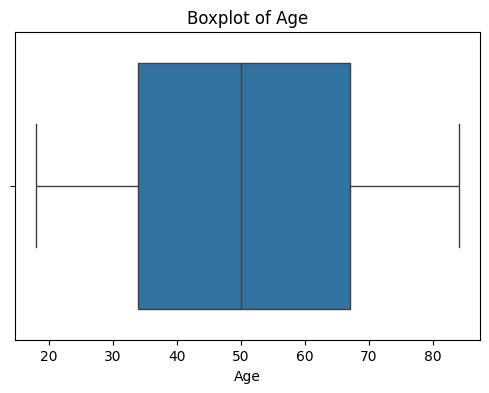

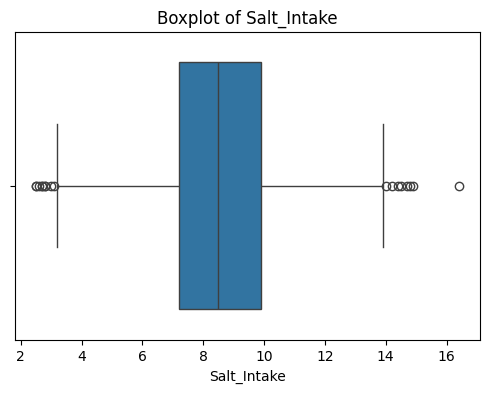

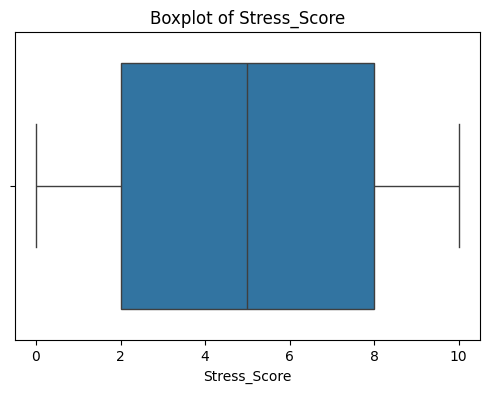

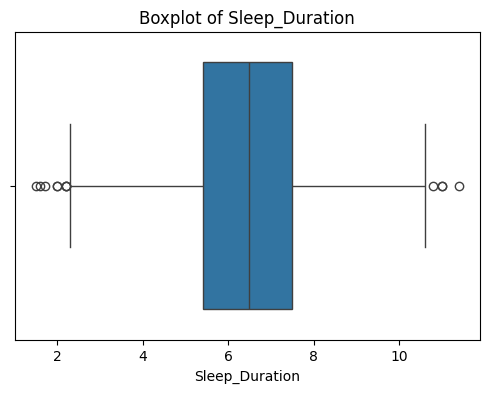

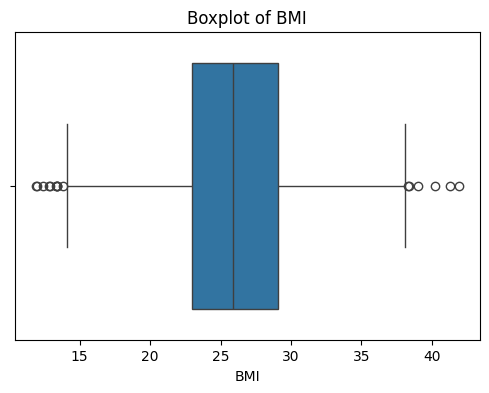

In [107]:
# Visualizing distribution of numerical columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [74]:
# outliers in numerical columns

def cap_outliers(df, columns):
    df_copy = df.copy()
    
    for col in columns:
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR


        df_copy[col] = np.where(df_copy[col] < lower_bound, lower_bound, df_copy[col])
        df_copy[col] = np.where(df_copy[col] > upper_bound, upper_bound, df_copy[col])

    return df_copy

df_new = cap_outliers(df, numeric_cols)


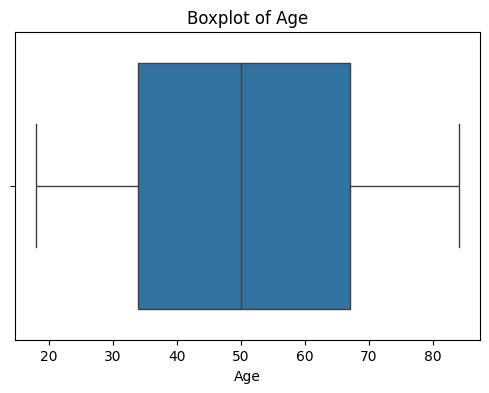

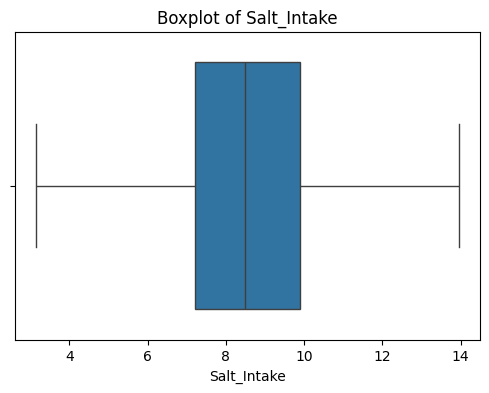

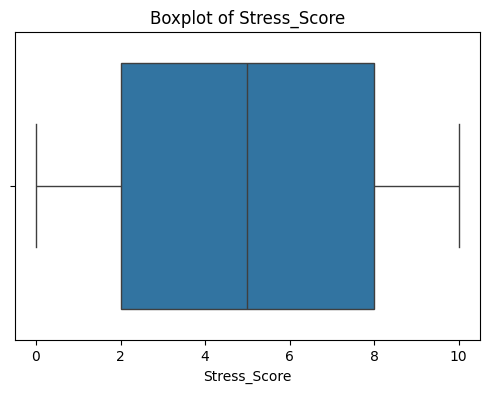

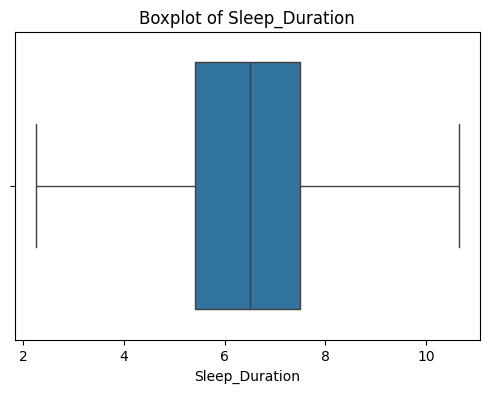

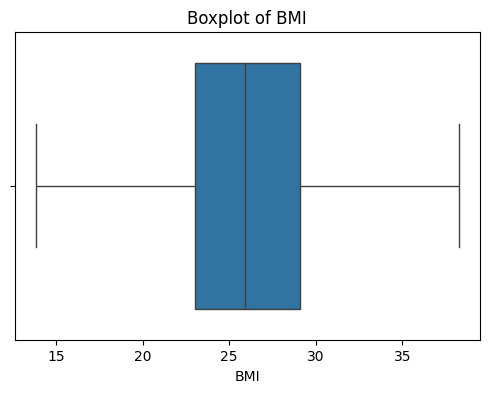

In [75]:
# Visualizing BoxPlot of numerical columns after handeling Outliers
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_new[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [78]:
le = LabelEncoder()

for col in cat_cols:
    df_new[col] = le.fit_transform(df_new[col])

In [80]:
y= df_new['Has_Hypertension']
X= df_new.drop('Has_Hypertension', axis=1)

In [ ]:
#Scaling 
scaler = MinMaxScaler()
df_new['Age'] = scaler.fit_transform(df_new[['Age']])

In [83]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# CatBoost Classifier
Cat = CatBoostClassifier(random_state=42, verbose=0)
Cat.fit(X_train, y_train)
y_pred_cat = Cat.predict(X_test)

# XGBoost Classifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [109]:
models = {
    "RandomForest": rf,
    "CatBoost": Cat,
    "XGBoost": xgb
}


results = []

for name, model in models.items():
    
    y_pred = model.predict(X_test)
    
    
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:,1]  
    else:
        
        y_proba = y_pred
    
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc = roc_auc_score(y_test, y_proba)
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "ROC-AUC": roc
    })


df_results = pd.DataFrame(results)
df_results = df_results.set_index("Model")
print(df_results)

              Accuracy  Precision    Recall  F1-score   ROC-AUC
Model                                                          
RandomForest  0.962217   0.970297  0.956098  0.963145  0.994970
CatBoost      0.994962   1.000000  0.990244  0.995098  0.999949
XGBoost       0.989924   0.990244  0.990244  0.990244  0.998780


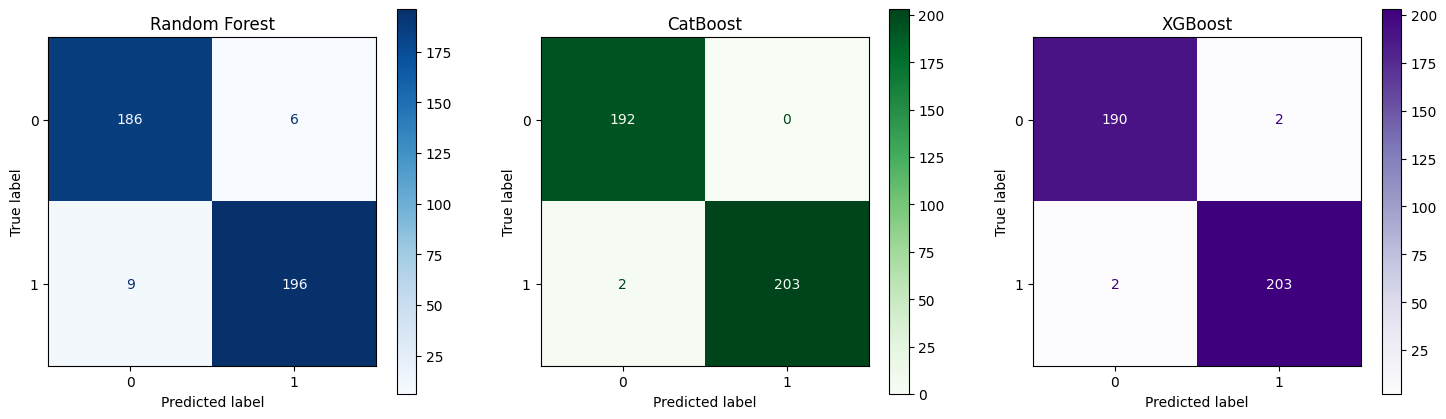

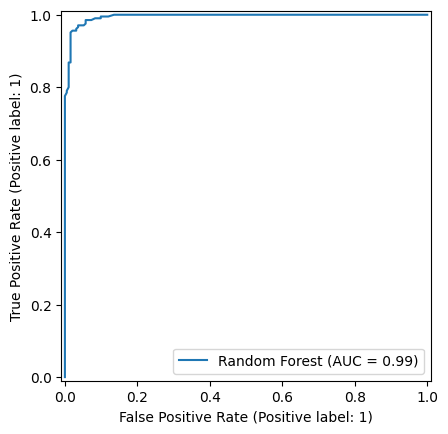

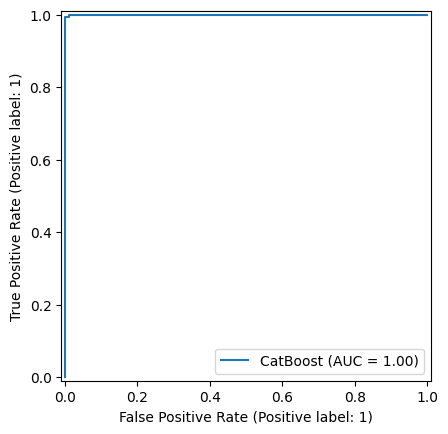

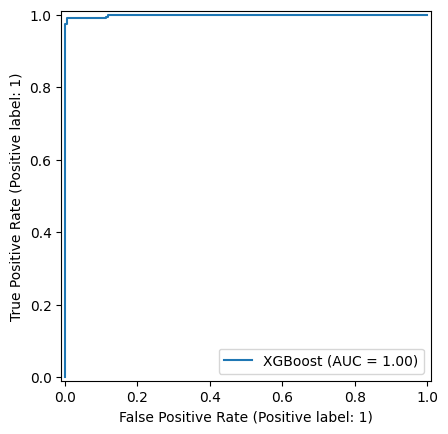

In [110]:
# Confusion Matrix And AUC Plots
fig, axes = plt.subplots(1,3, figsize=(18,5))
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, ax=axes[0], cmap="Blues")
axes[0].set_title("Random Forest")

ConfusionMatrixDisplay.from_estimator(Cat, X_test, y_test, ax=axes[1], cmap="Greens")
axes[1].set_title("CatBoost")

ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test, ax=axes[2], cmap="Purples")
axes[2].set_title("XGBoost")
plt.show()


RocCurveDisplay.from_estimator(rf, X_test, y_test, name="Random Forest")
RocCurveDisplay.from_estimator(Cat, X_test, y_test, name="CatBoost")
RocCurveDisplay.from_estimator(xgb, X_test, y_test, name="XGBoost")
plt.show()